## Texture mixing - first order method

In [5]:
from wasserstein.texture_mixing_new import compute_texture_mixing 
from utils.image_treatment import preprocess_image
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

## Example 1

In [6]:
image_path1 = 'data/smallRed.jpg'
image_path2 = 'data/PebbleGround.png'

In [7]:
image1 = preprocess_image(image_path1, new_size = (200,200))
image2 = preprocess_image(image_path2, new_size = (200,200))

In [8]:
textures = [image1, image2]
rho = [0.2, 0.4, 0.6, 0.8]
final_texture = []
for r in rho:
    final_texture.append(compute_texture_mixing(textures, [1-r, r], num_scales = 4, num_orientations = 4))

100%|██████████| 18/18 [00:08<00:00,  2.07it/s]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2..246].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-3..239].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4..226].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2..208].


(-0.5, 199.5, 199.5, -0.5)

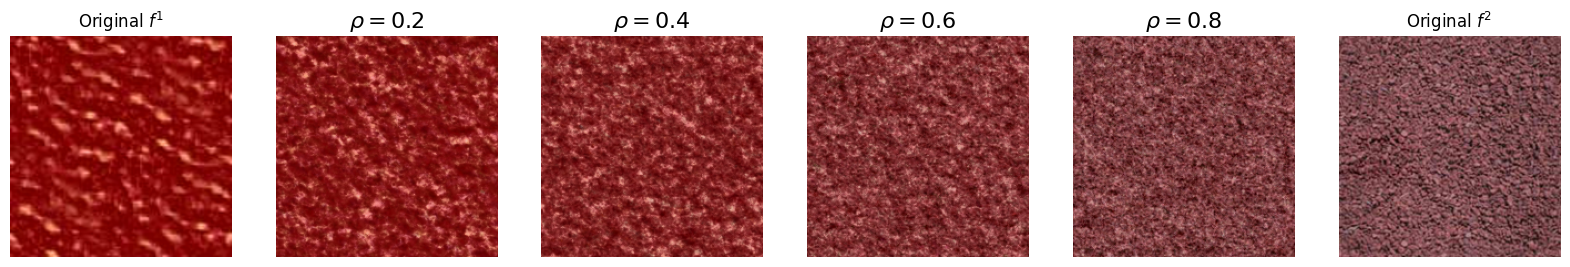

In [9]:
plt.figure(figsize=(20, 10))
plt.subplot(1,6,1)
plt.imshow(image1)
plt.axis('off') 
plt.title('Original $f^1$')
for i in range(len(final_texture)):
    plt.subplot(1,6,i+2)
    plt.imshow(final_texture[i])
    plt.title(f'$\\rho = {rho[i]}$', fontsize=16)
    plt.axis('off') 
plt.subplot(1,6,6)
plt.imshow(image2)
plt.title('Original $f^2$')
plt.axis('off') 

## Example 2

In [10]:
image_path1 = 'data/blue_wall.jpg'
image_path2 = 'data/golden.jpg'

image1 = preprocess_image(image_path1, new_size = (200,200))
image2 = preprocess_image(image_path2, new_size = (200,200))

In [11]:
textures = [image1, image2]
rho = [0.2, 0.4, 0.6, 0.8]
final_texture = []
for r in rho:
    final_texture.append(compute_texture_mixing(textures, [1-r, r], num_scales = 4, num_orientations = 4))

100%|██████████| 18/18 [00:07<00:00,  2.26it/s]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2..262].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-12..258].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-8..257].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-13..256].


(-0.5, 199.5, 199.5, -0.5)

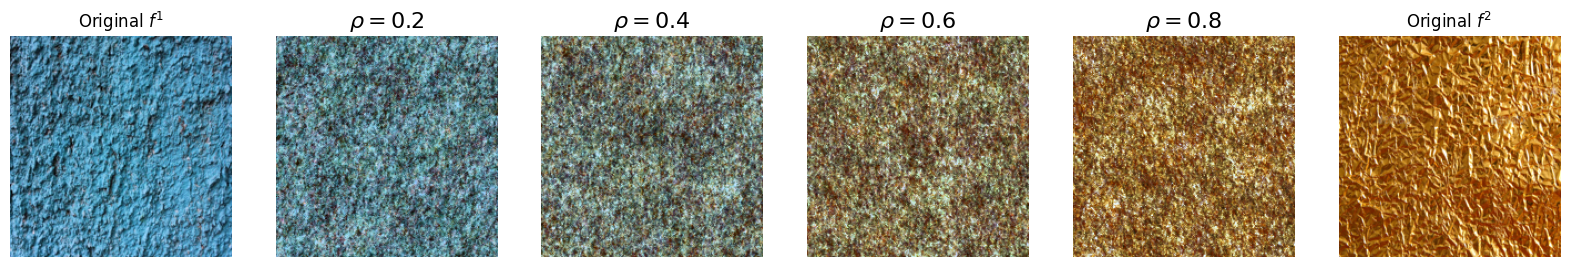

In [12]:
plt.figure(figsize=(20, 10))
plt.subplot(1,6,1)
plt.imshow(image1)
plt.axis('off') 
plt.title('Original $f^1$')
for i in range(len(final_texture)):
    plt.subplot(1,6,i+2)
    plt.imshow(final_texture[i])
    plt.title(f'$\\rho = {rho[i]}$', fontsize=16)
    plt.axis('off') 
plt.subplot(1,6,6)
plt.imshow(image2)
plt.title('Original $f^2$')
plt.axis('off') 

## Example 3



100%|██████████| 18/18 [00:17<00:00,  1.05it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-3..260].


100%|██████████| 18/18 [00:11<00:00,  1.54it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-5..259].


100%|██████████| 18/18 [00:17<00:00,  1.00it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-3..263].


100%|██████████| 18/18 [00:22<00:00,  1.24s/it]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [5..256].


100%|██████████| 18/18 [00:18<00:00,  1.04s/it]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [1..256].


100%|██████████| 18/18 [00:16<00:00,  1.10it/s]
Clipping input data to the valid range for imsh

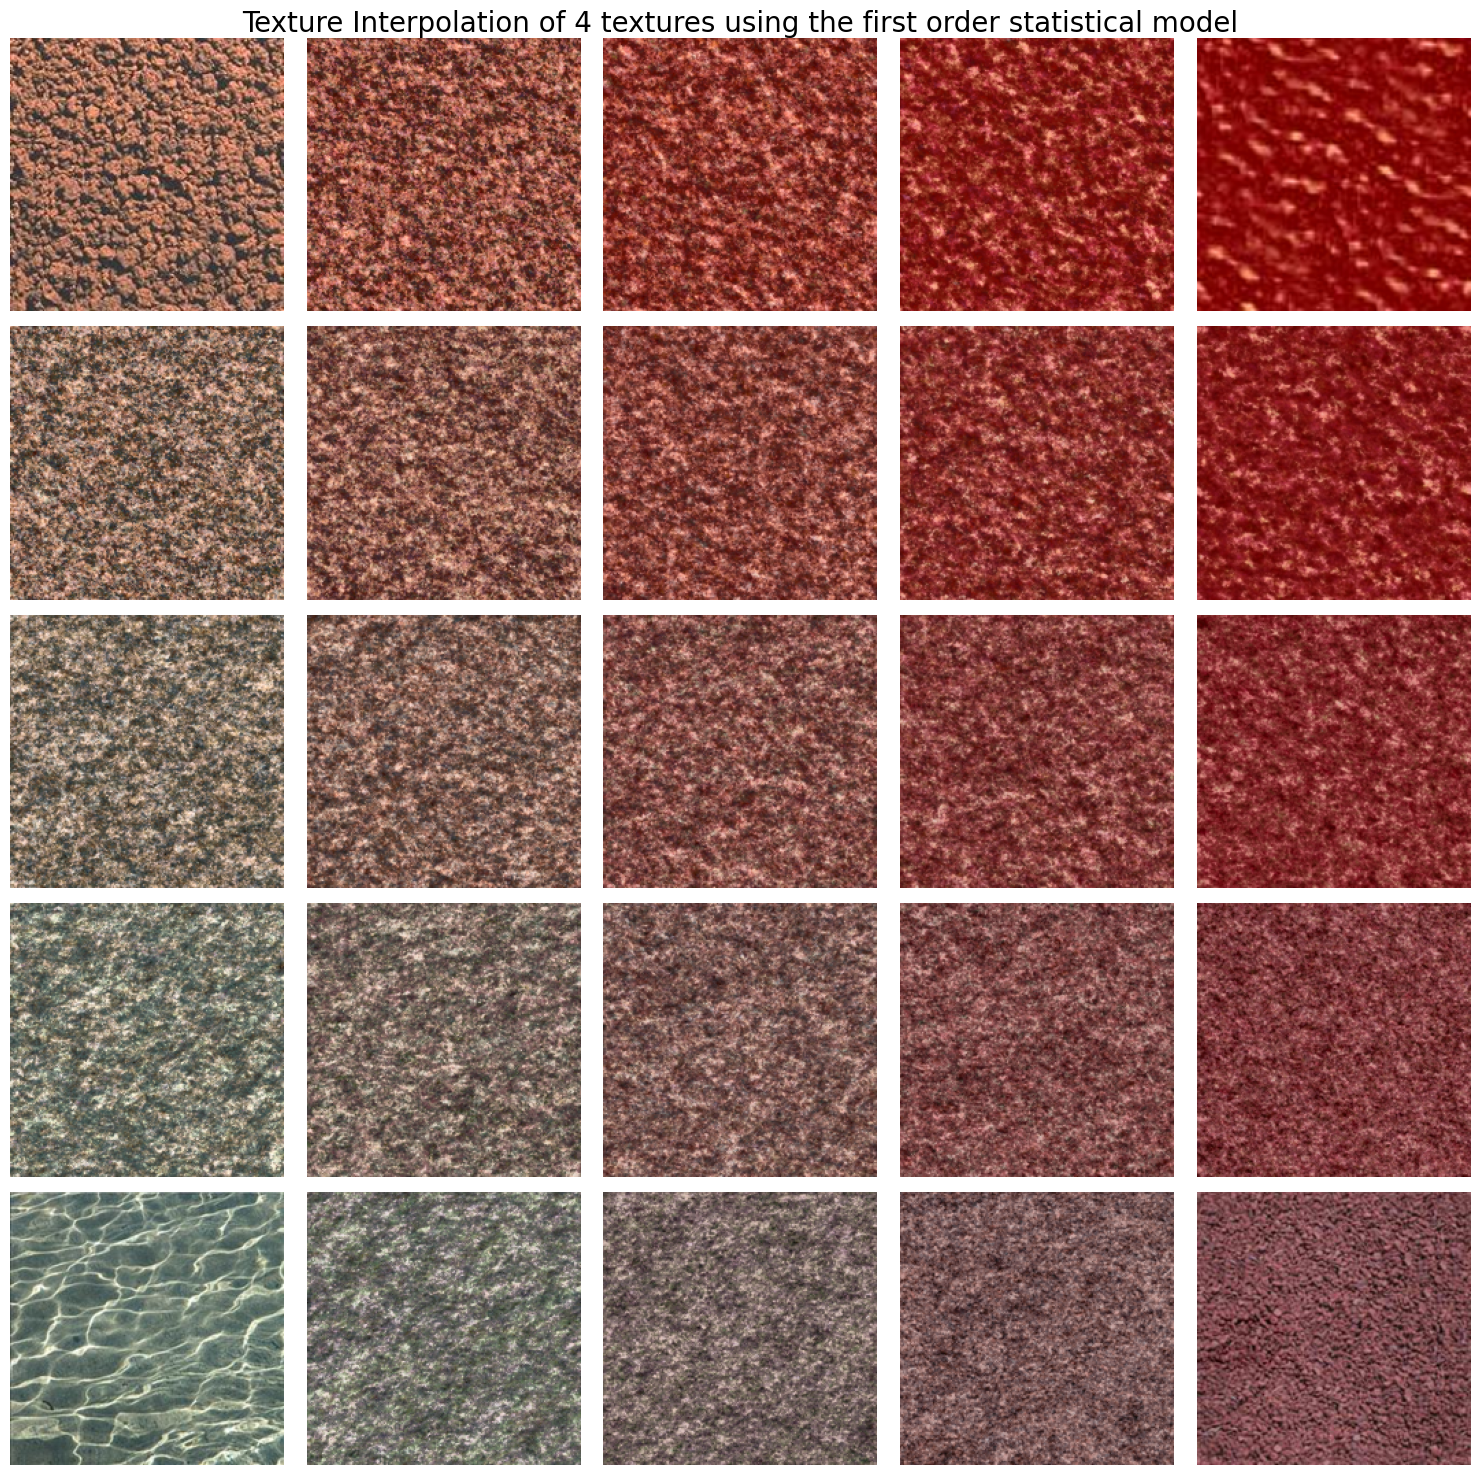

In [13]:
image_path1 = 'data/RedDirt.jpg'
image_path2 = 'data/Water.jpg'
image_path3 = 'data/smallRed.jpg'
image_path4 = 'data/PebbleGround.png'

size = 200
image1 = preprocess_image(image_path1, new_size=(size, size))
image2 = preprocess_image(image_path2, new_size=(size, size))
image3 = preprocess_image(image_path3, new_size=(size, size))
image4 = preprocess_image(image_path4, new_size=(size, size))

textures = [image1, image2, image3, image4]

alphas = np.linspace(0, 1, 5)  

plt.figure(figsize=(15, 15))

for i, alpha_x in tqdm(enumerate(alphas), desc="Rows"):
    for j, alpha_y in enumerate(alphas):
        if (alpha_x, alpha_y) == (0, 0):
            data = image1
            title = "x1"
        elif (alpha_x, alpha_y) == (1, 0):
            data = image2
            title = "x2"
        elif (alpha_x, alpha_y) == (0, 1):
            data = image3
            title = "x3"
        elif (alpha_x, alpha_y) == (1, 1):
            data = image4
            title = "x4"
        else:
            weights = [(1 - alpha_x) * (1 - alpha_y), alpha_x * (1 - alpha_y),
                       (1 - alpha_x) * alpha_y, alpha_x * alpha_y]
            data = compute_texture_mixing(textures, rho=weights, num_scales=4, num_orientations=4)
        
        ax = plt.subplot(5, 5, i * 5 + j + 1)
        ax.imshow(data)
        ax.axis('off')  

plt.suptitle("Texture Interpolation of 4 textures using the first order statistical model", fontsize=20)
plt.tight_layout()
plt.savefig("outputs/interpolation_4_textures.png")
plt.show()